# Week 2 - Day 3 Assignment

Dataset: `Walmart_customer_purchases.csv`

Tasks:
- Plot histogram and fit a normal distribution
- Identify probability of a customer spending above a threshold
- Simulate random sales data and compare to theoretical distribution


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt, pi, exp

# Load dataset
file_path = "Walmart_customer_purchases.csv"
df = pd.read_csv(file_path)

# Use Purchase_Amount column
amounts = pd.to_numeric(df["Purchase_Amount"], errors="coerce").dropna()

# Basic summary
print("Rows:", len(df))
print("Valid purchase amounts:", len(amounts))
print(amounts.describe())

Rows: 50000
Valid purchase amounts: 50000
count    50000.000000
mean       255.532230
std        141.574416
min         10.010000
25%        133.050000
50%        255.045000
75%        378.912500
max        499.990000
Name: Purchase_Amount, dtype: float64


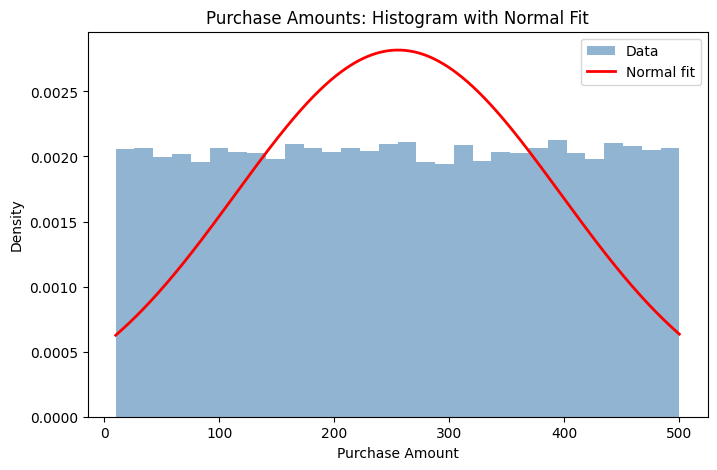

Mean (mu): 255.53
Std dev (sigma): 141.57


In [ ]:
# Fit normal distribution parameters
mu = amounts.mean()
sigma = amounts.std(ddof=1)

# Normal PDF for plotting
x = np.linspace(amounts.min(), amounts.max(), 400)
pdf = (1 / (sigma * sqrt(2 * pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot histogram and fitted normal curve
plt.figure(figsize=(8, 5))
plt.hist(amounts, bins=30, density=True, alpha=0.6, color="steelblue", label="Data")
plt.plot(x, pdf, "r-", linewidth=2, label="Normal fit")
plt.title("Purchase Amounts: Histogram with Normal Fit")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Mean (mu): {mu:.2f}")
print(f"Std dev (sigma): {sigma:.2f}")

In [ ]:
# Probability of spending above a threshold
threshold = 300  # change this value as needed

# Empirical probability from data
empirical_prob = (amounts > threshold).mean()

# Theoretical probability from normal fit (using erf)
z = (threshold - mu) / (sigma * sqrt(2))
normal_cdf = 0.5 * (1 + erf(z))
theoretical_prob = 1 - normal_cdf

print(f"Threshold: {threshold}")
print(f"Empirical P(X > threshold): {empirical_prob:.4f}")
print(f"Normal-fit P(X > threshold): {theoretical_prob:.4f}")

Threshold: 300
Empirical P(X > threshold): 0.4092
Normal-fit P(X > threshold): 0.3767


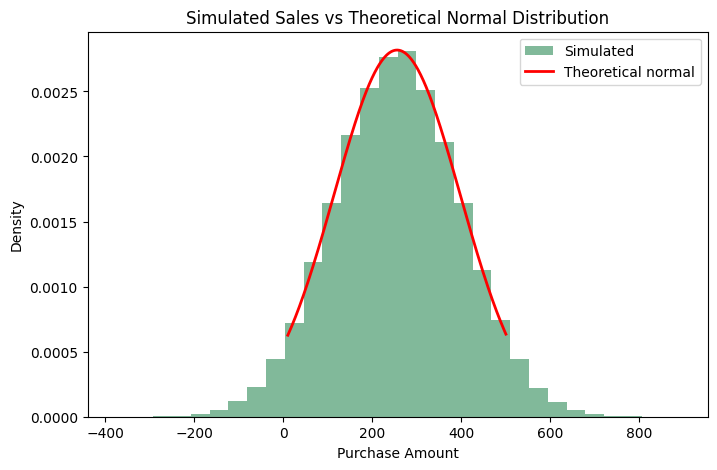

Simulated mean: 255.4726411294499
Simulated std dev: 141.59846481365798


In [ ]:
# Simulate random sales data and compare to theoretical distribution
np.random.seed(42)
simulated = np.random.normal(mu, sigma, size=len(amounts))

plt.figure(figsize=(8, 5))
plt.hist(simulated, bins=30, density=True, alpha=0.6, color="seagreen", label="Simulated")
plt.plot(x, pdf, "r-", linewidth=2, label="Theoretical normal")
plt.title("Simulated Sales vs Theoretical Normal Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Simulated mean:", simulated.mean())
print("Simulated std dev:", simulated.std(ddof=1))